# Twitter Sentiment Analysis

With a huge number of daily posts on social networks, extracting opinion is a challenging tasks which shows that sentimental analysis is an important area to research on. 

There are many domains where sentimental analysis can be applied on:

* **Business:** : In marketing field companies use it to develop their strategies, to understand customers’ feelings towards products or brand, how people respond to their campaigns or product launches and why consumers don’t buy some
products.
* **Politics:**  In political field, it is used to keep track of political view, to detect consistency and inconsistency between statements and actions at the government level. It can be used to predict election results as well.
* **Public Actions:** Sentiment analysis also is used to monitor and analyse social phenomena, for the spotting of potentially dangerous situations and determining the general mood of the blogosphere.
This is a sentiment analysis program that parses the tweets fetched from Twitter using Python. The analysis is about predicting whether the tweets indicates a positive, negative or neutral sentiment. This can also be known as opinion mining, deriving the opinion or attitude of a speaker. 

There are many methods and algorithms to implement sentiment-analysis systems, which can be classified as:

* **Rule-based** systems that perform sentiment analysis based on a set of manually crafted rules
* **Automatic** systems that rely on machine learning techniques to learn from data
* **Hybrid** systems that combine both rule-based and automatic approaches

The Twitter user whose tweets I’ll be analyzing is none other than Microsoft co-founder Bill Gates. I chose Bill Gates because he’s trying to make a positive impact on the world, so I suspect his tweets will also be mostly positive.



In [108]:
#Import the libraries
import tweepy 
from textblob import TextBlob
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import re
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

In [109]:
#Get THE data
log = pd.read_csv('keys.csv')

In [110]:
#Twitter API credentials
consumerKey = log['key'][0]
consumerSecret = log['key'][1]
accessToken =  log['key'][2]
accessTokenSecret =  log['key'][3]

In [111]:
#Create the authentication object
authenticate = tweepy.OAuthHandler(consumerKey, consumerSecret)

#Set the access token and access token secret
authenticate.set_access_token(accessToken, accessTokenSecret)

#Create the API object while passing in the auth information
api = tweepy.API(authenticate, wait_on_rate_limit = True)

In [112]:
# Extract 100 tweets from the twitter user
posts = api.user_timeline(screen_name = 'BillGates', count = 100, lang = "en", tweet_node = "extended")

#Print the last 5 tweets from the account
print("Show the 5 recent tweets: \n")
i = 1
for tweet in posts[0:5]:
  print(str(i) + ') ' + tweet.text + '\n')
  i += 1

Show the 5 recent tweets: 

1) There are several ways individuals can help move us closer to a zero-carbon future. Here are a few:… https://t.co/acU3R0nKts

2) Thanks @JudyWoodruff and @NewsHour for having me on the show to talk about climate change and COVID-19 – two urgent… https://t.co/1N6ZA6ytIO

3) @colbertlateshow @gatesfoundation I always have fun talking to @StephenAtHome. Thanks for inviting me to talk about… https://t.co/7EiDX6dnak

4) RT @melindagates: I’m grateful for new commitments from the EU, Germany, Canada, Japan, and the U.S. to help make safe and effective COVID-…

5) I’m inspired by @DonCheadle’s activism and humanitarian work. Thanks to @lawacthevents and @writersblocla for hosti… https://t.co/KkVdTgTifz



In [113]:
#Create a dataframe with a column called Tweets

df = pd.DataFrame([tweet.text for tweet in posts] , columns=['Tweets'])

#Show the first 5 rows of data
df.head()

,Tweets
0,There are several ways individuals can help mo...
1,Thanks @JudyWoodruff and @NewsHour for having ...
2,@colbertlateshow @gatesfoundation I always hav...
3,RT @melindagates: I’m grateful for new commitm...
4,I’m inspired by @DonCheadle’s activism and hum...


In [114]:
#Clean the text

#Create a function to clean the tweets
def cleanTxt(text):
 #r: tells python that the expression is a raw string
 #once the pattern is found substitute it to an empty string (remove the text)
  text = re.sub(r'@[A-Za-z0-9]+', '', text) #Removed @mentions
  text = re.sub(r'#', '', text) #Removing the '#' symbol
  text = re.sub(r'RT[\s]+', '', text) #Remove RT followed by one or more whitespaces
  text = re.sub(r'https?:\/\/\S+', '', text) #Remove the hyper link

  return text

#Cleaning the text
df['Tweets'] = df['Tweets'].apply(cleanTxt)

#Show the cleaned text
df

,Tweets
0,There are several ways individuals can help mo...
1,Thanks and for having me on the show to talk...
2,I always have fun talking to . Thanks for in...
3,: I’m grateful for new commitments from the EU...
4,I’m inspired by ’s activism and humanitarian w...
...,...
95,This honor is well deserved. COVID-19 is not j...
96,"For the last 25 years, Dr. Firdausi Qadri, an ..."
97,I’m excited to see this kind of innovation. De...
98,The only way to eliminate the threat of COVID-...


In [115]:
#Create a function to get the subjectivity (Subjectivity tells how subjective or opinionated the text is)
def getSubjectivity(text):
  return TextBlob(text).sentiment.subjectivity

#Create a function to get the polarity (Check how negative or positive the text is)
def getPolarity(text):
  return TextBlob(text).sentiment.polarity

#Create two new columns 
df['Subjectivity'] = df['Tweets'].apply(getSubjectivity)
df['Polarity'] = df['Tweets'].apply(getPolarity)

#Show the new dataframe with the new columns
df


,Tweets,Subjectivity,Polarity
0,There are several ways individuals can help mo...,0.062500,0.000000
1,Thanks and for having me on the show to talk...,0.200000,0.200000
2,I always have fun talking to . Thanks for in...,0.200000,0.250000
3,: I’m grateful for new commitments from the EU...,0.584848,0.412121
4,I’m inspired by ’s activism and humanitarian w...,0.200000,0.200000
...,...,...,...
95,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000
96,"For the last 25 years, Dr. Firdausi Qadri, an ...",0.066667,0.000000
97,I’m excited to see this kind of innovation. De...,0.737500,0.243750
98,The only way to eliminate the threat of COVID-...,0.829630,0.033333


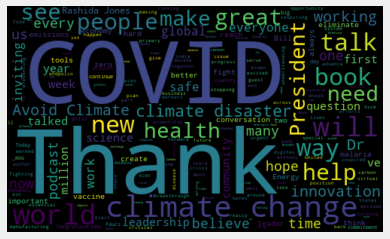

In [116]:
#Plot the word cloud
allWords = ' '.join([twts for twts in df['Tweets']])
wordCloud = WordCloud(width = 500, height = 300, random_state = 21, max_font_size = 119).generate(allWords)

plt.imshow(wordCloud, interpolation = 'bilinear')
plt.axis('off')
plt.show()

In [117]:
#Create a function to compute the negative, neutral and positive analysis
def getAnalysis(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'

df['Analysis'] = df['Polarity'].apply(getAnalysis)

#Show the dataframe
df

,Tweets,Subjectivity,Polarity,Analysis
0,There are several ways individuals can help mo...,0.062500,0.000000,Neutral
1,Thanks and for having me on the show to talk...,0.200000,0.200000,Positive
2,I always have fun talking to . Thanks for in...,0.200000,0.250000,Positive
3,: I’m grateful for new commitments from the EU...,0.584848,0.412121,Positive
4,I’m inspired by ’s activism and humanitarian w...,0.200000,0.200000,Positive
...,...,...,...,...
95,This honor is well deserved. COVID-19 is not j...,0.000000,0.000000,Neutral
96,"For the last 25 years, Dr. Firdausi Qadri, an ...",0.066667,0.000000,Neutral
97,I’m excited to see this kind of innovation. De...,0.737500,0.243750,Positive
98,The only way to eliminate the threat of COVID-...,0.829630,0.033333,Positive


In [118]:
# print all of the positive tweets (The most positive tweets will appear first)
j = 1
sortedDF = df.sort_values(by=['Polarity']) #Sort values by polarity
for i in range(0, sortedDF.shape[0]): #sortedDF.shape[0] is the number of rows in the dataframe
  if (sortedDF['Analysis'][i] == 'Positive'): 
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j += 1

1) Thanks  and  for having me on the show to talk about climate change and COVID-19 – two urgent… 

2)   I always have fun talking to . Thanks for inviting me to talk about… 

3) : I’m grateful for new commitments from the EU, Germany, Canada, Japan, and the U.S. to help make safe and effective COVID-…

4) I’m inspired by ’s activism and humanitarian work. Thanks to  and  for hosti… 

5)  Thanks  for talking with me about this challenge and why we need to act now.

6) Meaningful action from business leaders will require the courage to take risks that many companies aren't used to t… 

7) Thanks to , , and everyone who joined our virtual conversation about climate change.… 

8) Great to see this important step as the United States resumes our global leadership on climate change. Looking forw… 

9) Thanks to  for hosting the launch of my virtual book tour. It was great to hear so many thoughtful… 

10) : Bill Gates on Climate Change, Covid and Whether He Has Too Much Influence 

11) Than

In [119]:
#Print the negative tweets
j = 1
sortedDF = df.sort_values(by=['Polarity'], ascending='False')
for i in range(0, sortedDF.shape[0]):
  if(sortedDF['Analysis'][i] == 'Negative'):
    print(str(j) + ') ' + sortedDF['Tweets'][i])
    print()
    j = j+1

1) : The Weekly Planet: Lately, Bill Gates has been thinking about what he calls the “hard stuff” of climate change. These hard…

2) : "People who think a plan is easy are wrong. People who think a plan is impossible are wrong. It's super hard and very broad,…

3) : Only 3% of Black students learn computer science in high school or beyond. Please watch and share this video. Inspire a studen…

4) COVID-19 has cost lives, sickened millions, and thrust the global economy into a devastating recession. But hope is… 

5) Here are four other ways that America can advance its leadership on climate change this year and put the world on a… 

6) We need to revolutionize the world’s physical economy—and that will take, among other things, a dramatic infusion o… 

7) Nearly forty million people have Alzheimer’s or dementia today. We have no way to stop or even slow the disease at… 

8) : Even with his busy schedule, Dr. Fauci took the time to sit down with me (AGAIN) and talk about what we’ve gotte

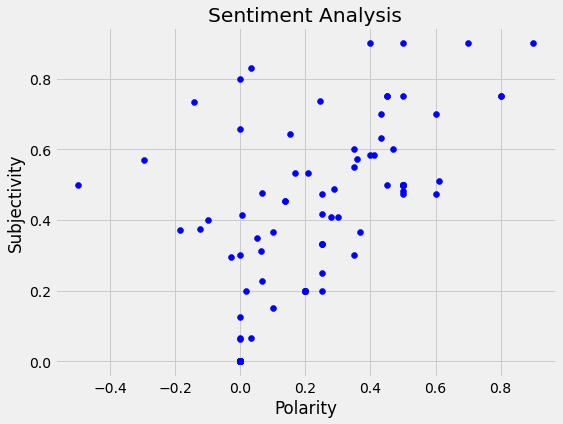

In [120]:
#Plot the polarity and subjectivity
plt.figure(figsize=(8,6))
for i in range(0, df.shape[0]):
  plt.scatter(df['Polarity'][i], df['Subjectivity'][i], color='Blue')

plt.title('Sentiment Analysis')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')
plt.show()

In [130]:
#Get the percentage of positive tweets
ptweets = df[df.Analysis == 'Positive']
ptweets = ptweets['Tweets']

print("Positive tweets percentage: {} %".format(round((ptweets.shape[0] / df.shape[0])*100, 1)))

Positive tweets percentage: 66.0 %


In [131]:
#Get the percentage of negative tweets
ntweets = df[df.Analysis == 'Negative']
ntweets = ntweets['Tweets']

print("Negative tweets percentage: {} %".format(round((ntweets.shape[0] / df.shape[0])*100, 1)))

Negative tweets percentage: 8.0 %


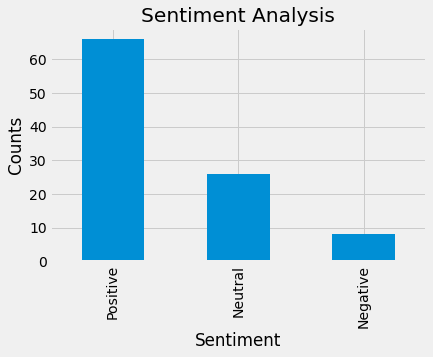

In [123]:
#Show the value counts

df['Analysis'].value_counts()

#plot and visualize the counts
plt.title('Sentiment Analysis')
plt.xlabel('Sentiment')
plt.ylabel('Counts')
df['Analysis'].value_counts().plot(kind='bar')
plt.show()